In [1]:
# ROBERT HEETER
# ELEC 378 Machine Learning
# 20 January 2023

# PROBLEM SET 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt


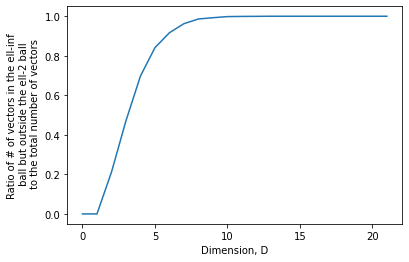

In [3]:
# PROBLEM 1

# max dimension to simulate
D = 22

# store the estimated volume in each dimension
volume = np.squeeze(np.zeros((1,D)))

# in d dimensions
for d in np.arange(1,D):
    # generate N random vectors uniformly distributed throughout the ell-infinity ball
    # and stack them as rows in the matrix X
    N = 1000*d
    X = np.random.uniform(-1,1,(N,d))

    # estimate the volume between the ell-infinity and ell-2 ball using the random samples
    # use the ratio of vectors in the ell-infinity ball that lie outside of the ell-2 ball
    # (i.e. the number of vectors with 2-norm greater than 1) to the total number of vectors
    # as a metric for the distribution between the ell-infinity and ell-2 balls
    volume[d] = sum((np.linalg.norm(X,ord=2,axis=1) > 1)*1)/N

# plot the dimension vs. volume between the ell-infinity and ell-2 ball
plt.plot(volume)
plt.xlabel('Dimension, D')
plt.ylabel('Ratio of # of vectors in the ell-inf\n ball but outside the ell-2 ball\n to the total number of vectors')
plt.show()


In [4]:
# PROBLEM 3

from scipy.io import loadmat
from scipy.io.wavfile import write
import numpy as np


In [7]:
data = loadmat('cauchy_schwarz_decoding.mat')

y = data['y']
c0 = data['c0']
c1 = data['c1']

# construct the matrix C which contains as columns the carriers c0 and c1
C = np.transpose(np.array([c0[0],c1[0]]))

# construct the matrix Y which contains as rows the received (noisy) carrier
# tones corresponding to each transmitted bit
# the width of Y should be equal to the length of one carrier tone
Y = y.reshape(-1,np.shape(C)[0])

# use matrix multiplication of C and Y to compute the sequence of inner products
# between each received (noisy) carrier tone and each known carrier tone (c0 and c1)
S = np.matmul(Y,C)

# use argmax to decode according to cauchy schwarz 
# bits should have shape (N,) where N is the number of decoded bits
bits = np.argmax(np.abs(S), axis=1)


(1, 521280)


In [6]:
# conversion from binary to uint8
strResult = ''.join(str(n) for n in bits)
byteResult = list(int(strResult[i : i+8][::-1], 2) for i in range(0, len(strResult), 8))
arrayResult = np.asarray([byteResult]).astype('uint8')

# writing decoded bits as a .jpg
f = open('decoded.jpg','wb')
f.write(arrayResult)
f.close()


In [7]:
# construct the matrix X which contains in its i^th column the carrier tone 
# corresponding to the i^th bit transmitted
X = C[:,bits]

# construct the signal x(t) by playing the carrier tones in sequence
x = X.flatten('F')
y = y.flatten()

# listen to the noisy received signal y(t) vs your denoised reconstruction x(t)
fs = 44100
write("y.wav",fs,y)
write("x.wav",fs,x)
